## Import Packages & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import sympy

from pysr import PySRRegressor

In [2]:
data = nc.Dataset("kepler_gen/kepler.nc").variables
keys = data.keys()
values = data.values()

data_dict = {}
for k, v in zip(keys, values):
    data_dict[k] = np.array(v)
    
df = pd.DataFrame(data_dict)

In [3]:
df

,t,x,y,vx,vy,E,L,g
0,0.000000,2.919807,-2.386163,-0.582427,0.015088,-0.095470,-1.345712,0
1,0.009153,2.914474,-2.386024,-0.582926,0.015496,-0.095470,-1.345712,0
2,0.018306,2.909136,-2.385880,-0.583426,0.015906,-0.095470,-1.345712,0
3,0.027459,2.903793,-2.385732,-0.583926,0.016316,-0.095470,-1.345712,0
4,0.036612,2.898447,-2.385581,-0.584427,0.016728,-0.095470,-1.345712,0
...,...,...,...,...,...,...,...,...
50003,90.252157,3.218096,-3.962491,0.411937,0.171525,-0.096343,2.184281,4
50004,90.261185,3.221815,-3.960941,0.411718,0.171794,-0.096343,2.184281,4
50005,90.270214,3.225531,-3.959389,0.411500,0.172063,-0.096343,2.184281,4
50006,90.279243,3.229245,-3.957834,0.411281,0.172331,-0.096343,2.184281,4


In [4]:
grps = np.unique(df.g)
grps

array([0, 1, 2, 3, 4], dtype=uint64)

## Explore Data

### 1. Position

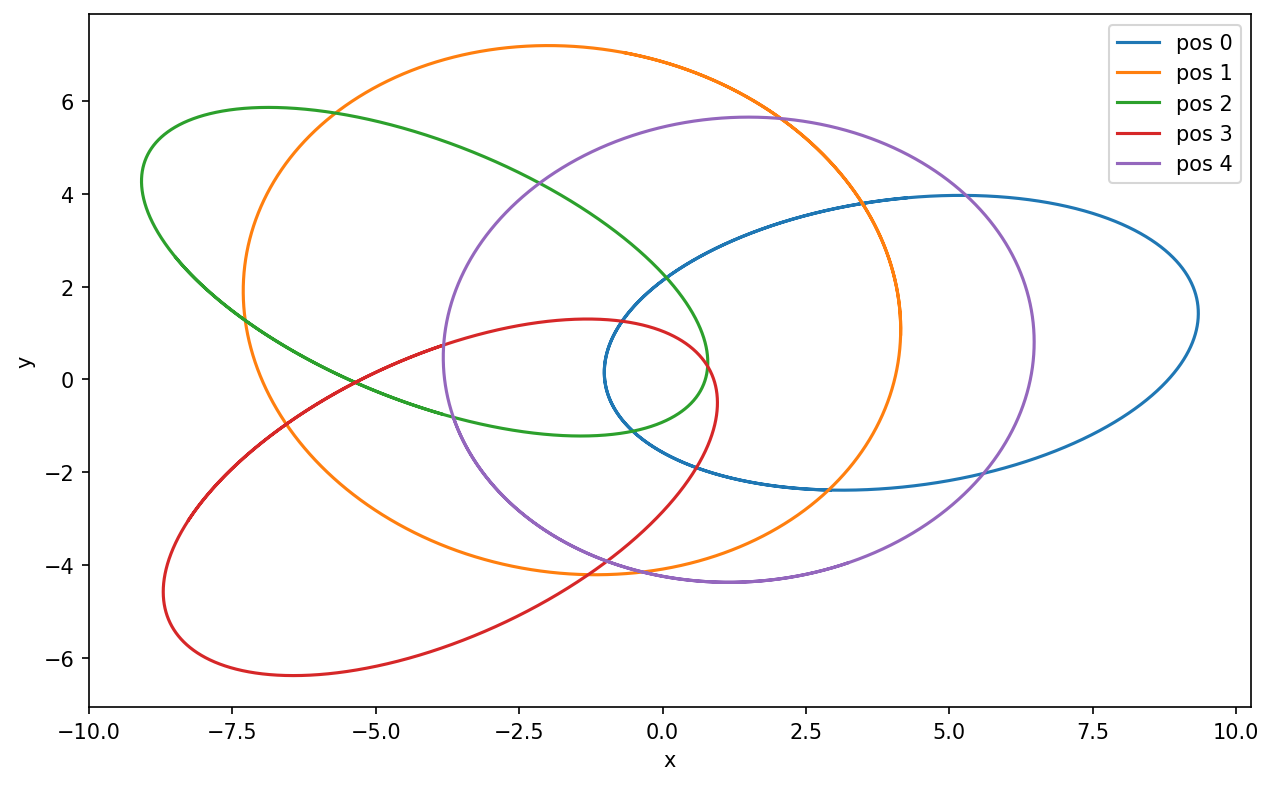

In [5]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.x[df.g == g], df.y[df.g == g], label=f'pos {g}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Velocity

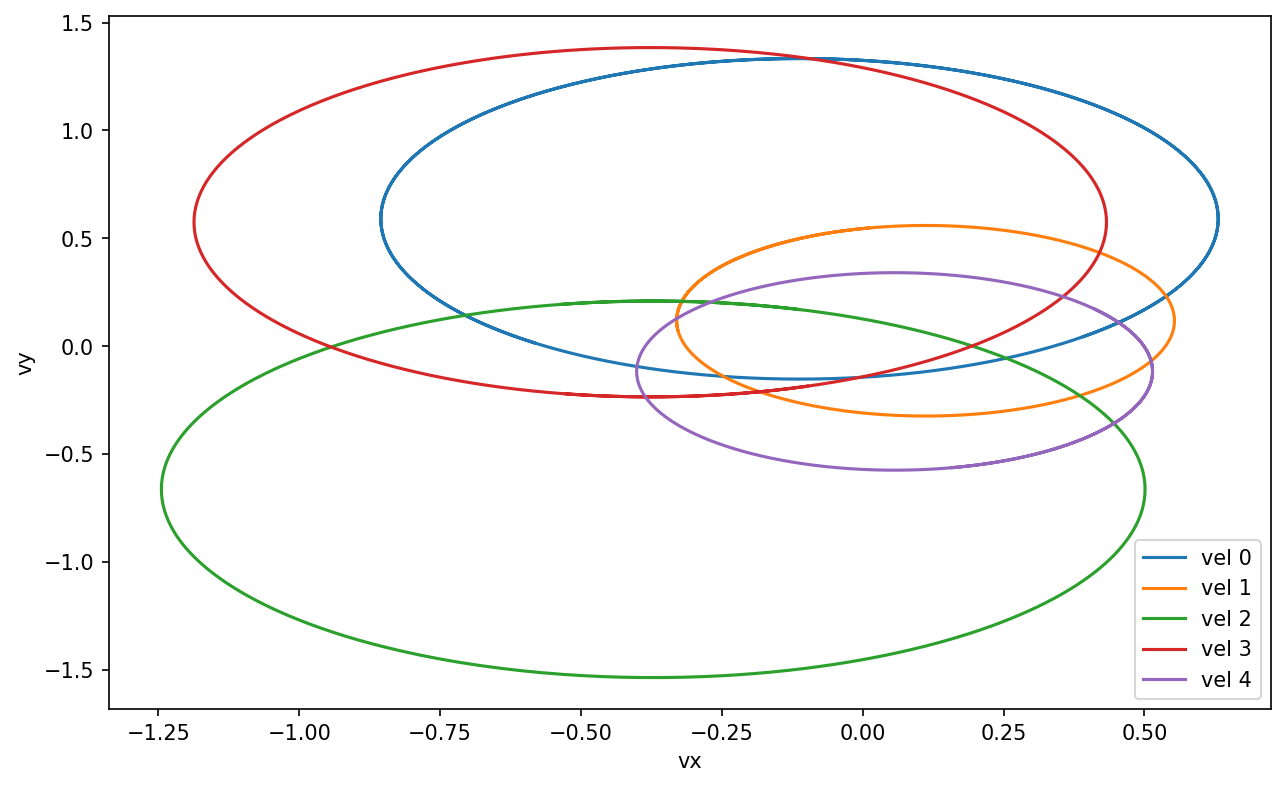

In [6]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.vx[df.g == g], df.vy[df.g == g], label=f'vel {g}')
plt.xlabel('vx')
plt.ylabel('vy')
plt.legend()
plt.show()

### 3. Position in time

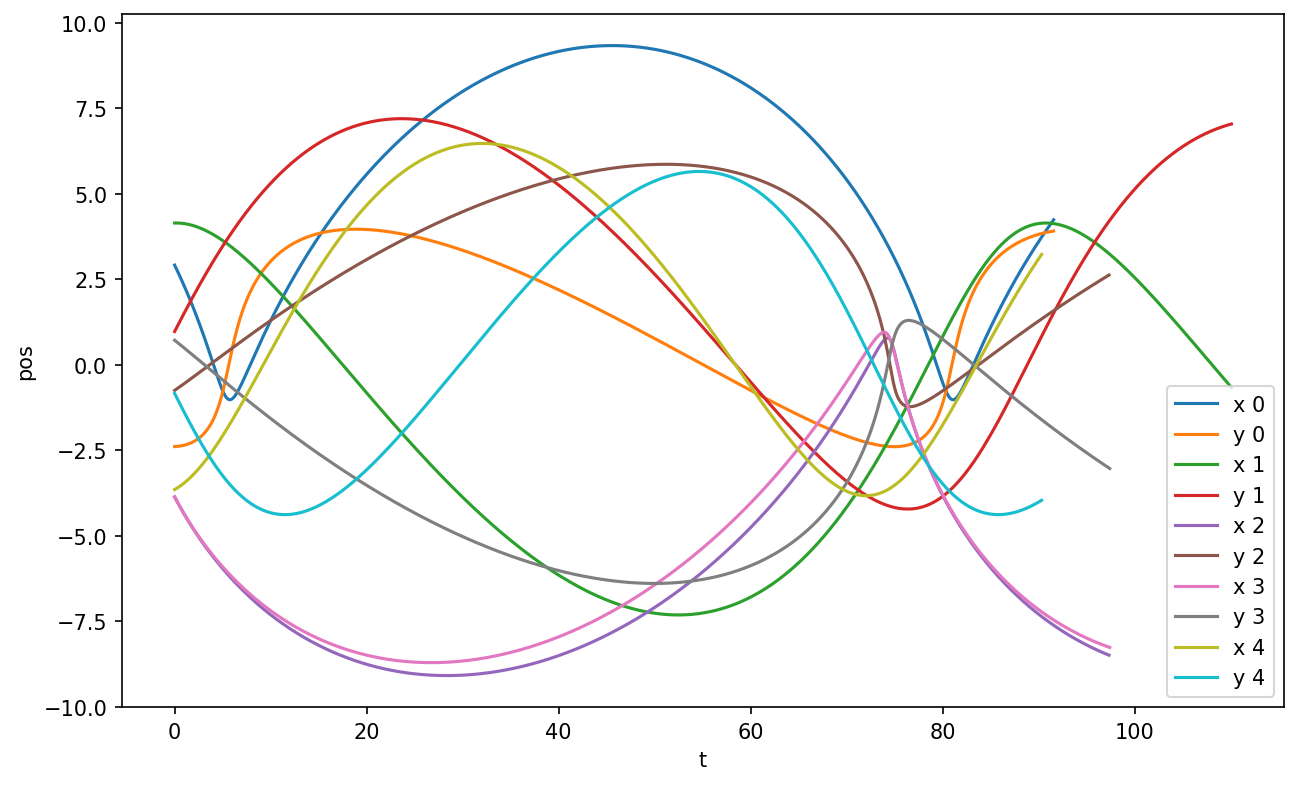

In [7]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.x[df.g == g], label=f'x {g}')
    plt.plot(df.t[df.g == g], df.y[df.g == g], label=f'y {g}')
plt.xlabel('t')
plt.ylabel('pos')
plt.legend()
plt.show()

### 4. Velocity in time

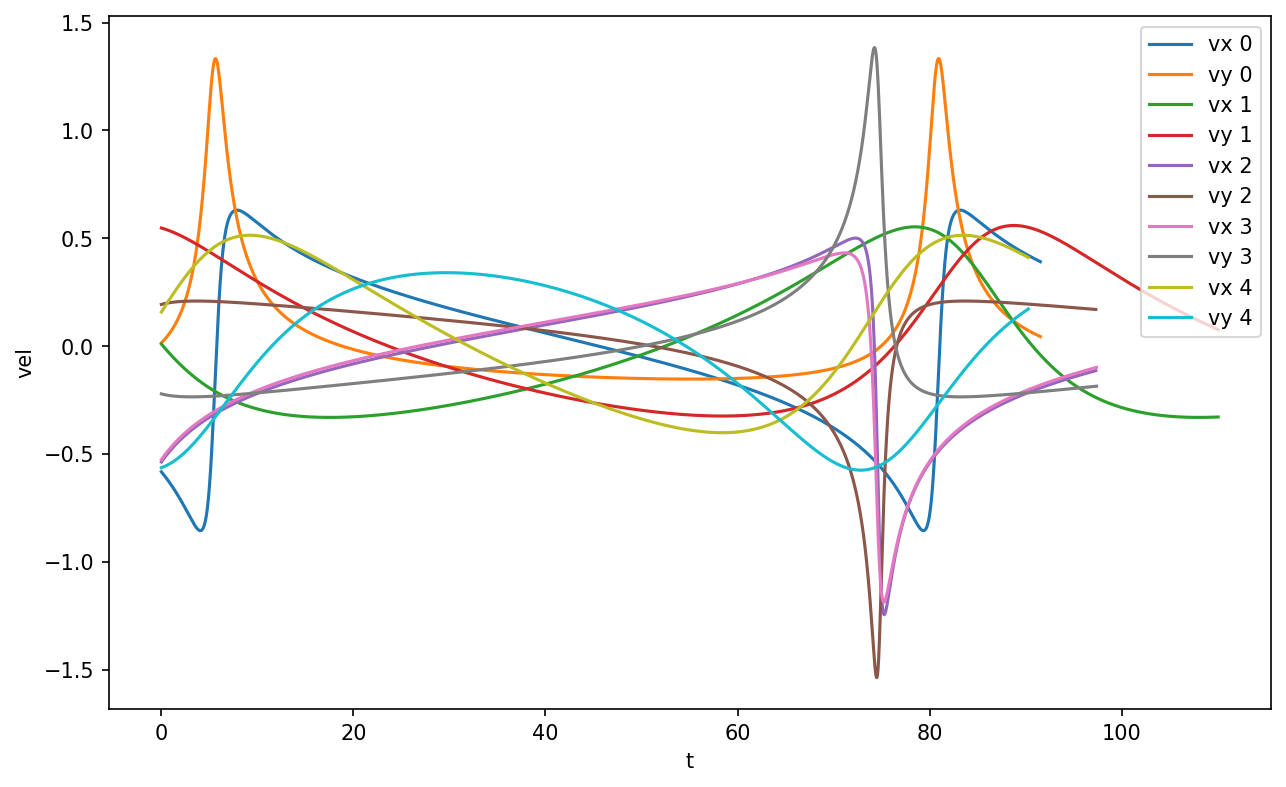

In [8]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.vx[df.g == g], label=f'vx {g}')
    plt.plot(df.t[df.g == g], df.vy[df.g == g], label=f'vy {g}')
plt.xlabel('t')
plt.ylabel('vel')
plt.legend()
plt.show()

### 5. Energy in time

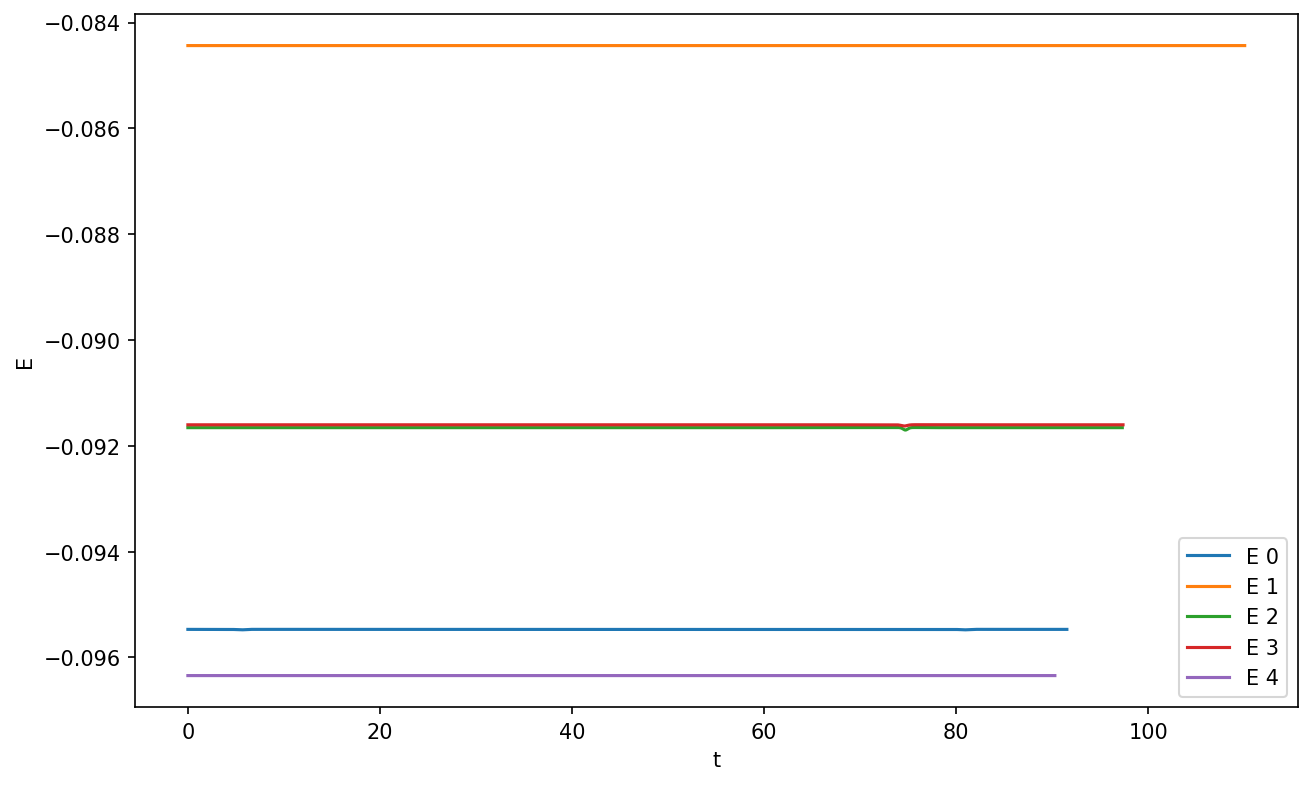

In [9]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.E[df.g == g], label=f'E {g}')
plt.xlabel('t')
plt.ylabel('E')
plt.legend()
plt.show()

### 6. Angular momentum in time

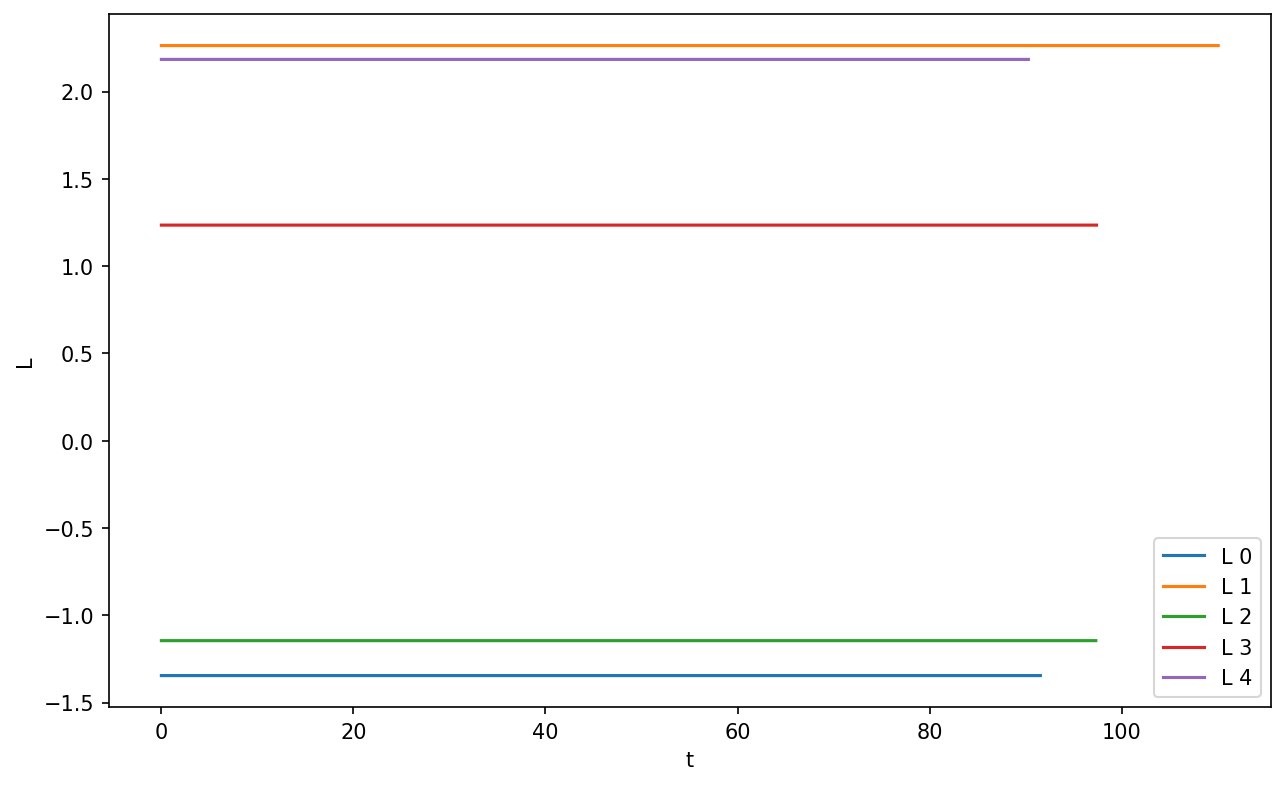

In [10]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.L[df.g == g], label=f'L {g}')
plt.xlabel('t')
plt.ylabel('L')
plt.legend()
plt.show()

## PySR for Energy

### Model Building & Data in matrix form

In [11]:
model = PySRRegressor(
    niterations=100,
    populations=100,
    binary_operators=["+", "-", "*"],
    unary_operators=["square"],
    constraints={
        'square': 1
    },
    maxdepth=10,
)

In [12]:
X = df.to_numpy()[:,1:-1]

In [13]:
E = X[:,-2]
X = X[:,:-2]
U = 1 / np.sqrt(X[:,0]**2 + X[:,1]**2)
X = np.column_stack([U, X[:,2:]]) # It is not order invariant

* `PySR` is not order invariant! The first column is most-used feature..

In [14]:
X.shape

(50008, 3)

### Model fitting

In [15]:
model.fit(X[::10,:], E[::10]);

/home/xteca/.local/lib/python3.10/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 8.260e+04
Head worker occupation: 2.8%
Progress: 228 / 10000 total iterations (2.280%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.767e-05  -1.000e-10  -0.09190261
5           1.743e-05  3.468e-03  ((x0 * -0.0035320441) + -0.09122625)
6           1.740e-05  1.744e-03  ((square(x1) * -0.0033515478) + -0.09152865)
8           1.728e-05  3.458e-03  (-0.091914825 - ((square(x1) + x1) * 0.0013287185))
12          1.711e-05  2.431e-03  (((-0.947205 - (square(x1) - (x1 * -0.68539715))) * 0.0033515957) + -0.08835403)
14          1.705e-05  1.738e-03  ((((-0.9472017 - square(x1)) - x1) * 0.004296947) + ((x1 * 0.002479589) + -0.08736986))
15          1.704e-05  8.294e-04  (((-13.251804 - x0) + (((x2 - -0.28185052) + 0.3291035) * (x2 - x0))) * 0.0068190084)
17          1.698e-05  1.647e-03  (((-14.858039 - x0) + ((((x2 - x0) + 0.6378761) + x0) * (x2 - x0))) * 0.0060910285)

Press 'q' and then <enter> 

### Result

In [16]:
model.get_hof()

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,1.767100e-05,0.000000,-0.09190261,-0.0919026100000000,PySRFunction(X=>-0.0919026100000000)
1,5,1.742756e-05,0.003468,((x0 * -0.0035320441) + -0.09122625),-0.0035320441*x0 - 0.09122625,PySRFunction(X=>-0.0035320441*x0 - 0.09122625)
2,6,1.739719e-05,0.001744,((square(x1) * -0.0033515478) + -0.09152865),-0.0033515478*x1**2 - 0.09152865,PySRFunction(X=>-0.0033515478*x1**2 - 0.09152865)
3,7,1.727329e-05,0.007148,(((x1 + x0) * -0.0018321824) + -0.091568545),-0.0018321824*x0 - 0.0018321824*x1 - 0.091568545,PySRFunction(X=>-0.0018321824*x0 - 0.001832182...
4,8,1.719299e-05,0.004660,(((-44.002068 - square(x1)) - x1) * 0.0020837497),-0.0020837497*x1**2 - 0.0020837497*x1 - 0.0916...,PySRFunction(X=>-0.0020837497*x1**2 - 0.002083...
5,9,1.705088e-05,0.008300,((((x1 + 0.4322567) * -0.0042544627) * x1) + -...,x1*(-0.0042544627*x1 - 0.00183902000697509) - ...,PySRFunction(X=>x1*(-0.0042544627*x1 - 0.00183...
6,11,7.022844e-13,8.502565,(((square(x2) - x0) - (x0 - square(x1))) * 0.4...,-0.99999088*x0 + 0.49999544*x1**2 + 0.49999544...,PySRFunction(X=>-0.99999088*x0 + 0.49999544*x1...
7,13,1.643012e-15,3.028903,((((square(x2) - x0) - (x0 - square(x1))) * 0....,-0.99999088*x0 + 0.49999544*x1**2 + 0.49999544...,PySRFunction(X=>-0.99999088*x0 + 0.49999544*x1...
8,15,1.634921e-16,1.153761,((((square(x2) - x0) - ((x1 * 2.9602234e-8) - ...,-1.0*x0 + 0.5*x1**2 - 1.4801117e-8*x1 + 0.5*x2**2,PySRFunction(X=>-1.0*x0 + 0.5*x1**2 - 1.480111...
9,16,1.237318e-16,0.278648,((((square(x2) - x0) - ((square(x1) * 2.960223...,-1.0*x0 + 0.499999985198883*x1**2 + 0.5*x2**2,PySRFunction(X=>-1.0*x0 + 0.499999985198883*x1...


In [17]:
best_model = model.get_best()

In [18]:
best_model.equation

'((((square(x2) - x0) - ((x1 * 2.9602234e-8) - square(x1))) - x0) * 0.5)'

In [21]:
best_model.sympy_format

-1.0*x0 + 0.5*x1**2 - 1.4801117e-8*x1 + 0.5*x2**2

$$\frac{1}{2}(v_x^2 + v_y^2) - \frac{1}{r} - 10^{-8}v_x$$

In [19]:
E_eval = best_model.lambda_format(X[::1000,:])

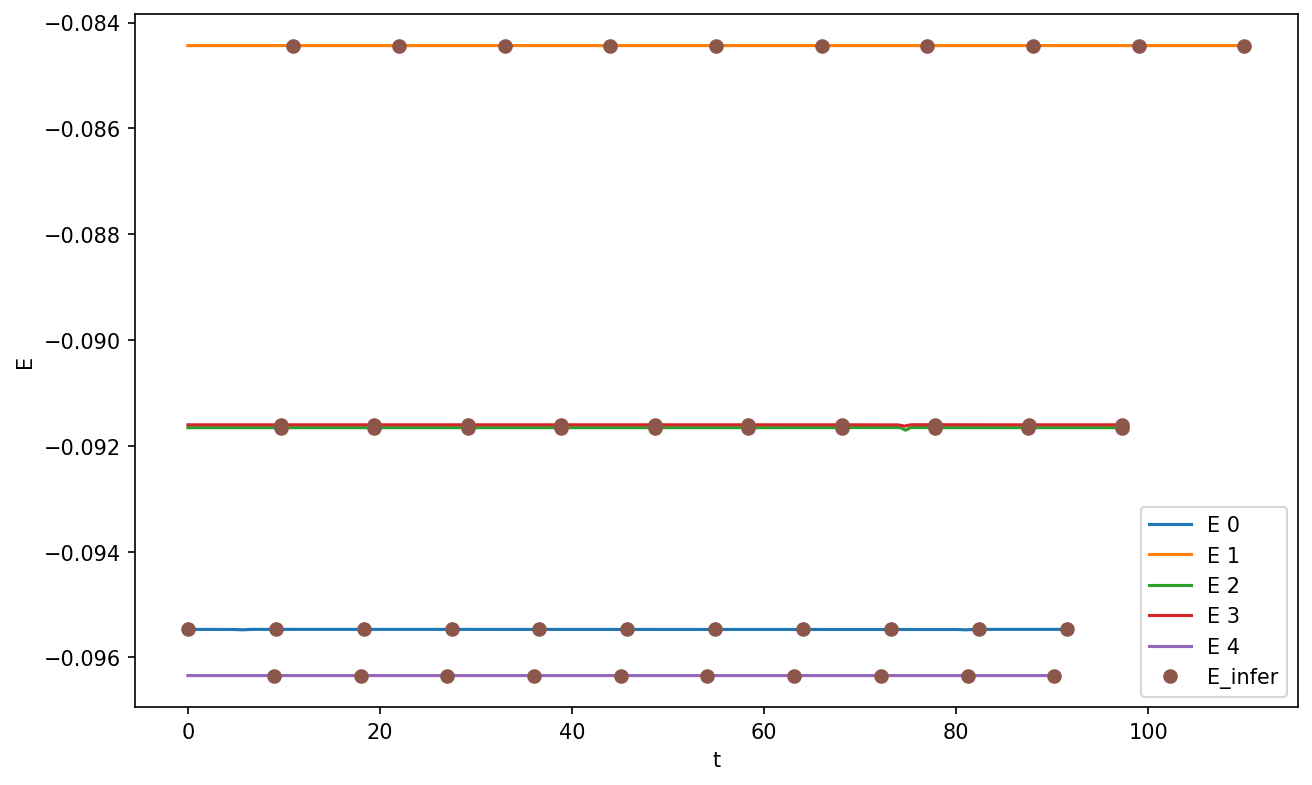

In [20]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.E[df.g == g], label=f"E {g}")
plt.plot(df.t[::1000], E_eval, 'o', label="E_infer")
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.savefig('E_infer.png', dpi=300, bbox_inches='tight')
plt.show()